In [9]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


pd_records = pd.read_csv("./20231018_165051_records.tsv", sep='\t', index_col=0)

In [7]:
pd_records.head()

,feature,time(s),regressor,target,rmse,mae,spearman
0,binary,0.083286,lr,Activity,2.952009e+12,3.018603e+11,0.699188
1,binary,0.082994,lr,Selectivity,4.104160e+12,5.107344e+11,0.642808
2,binary,0.079688,lr,Fitness,3.000353e+12,3.754871e+11,0.759889
3,binary,0.076096,lr,Score,1.408899e+12,1.616031e+11,0.300339
4,binary,0.152660,ridge,Activity,3.087686e-01,2.268326e-01,0.785466


In [5]:
pd_records.columns

Index(['feature', 'time(s)', 'regressor', 'target', 'rmse', 'mae', 'spearman'], dtype='object')

### 评分汇总

#### results

C:\Users\66410\AppData\Local\Temp\ipykernel_42472\3216361765.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)


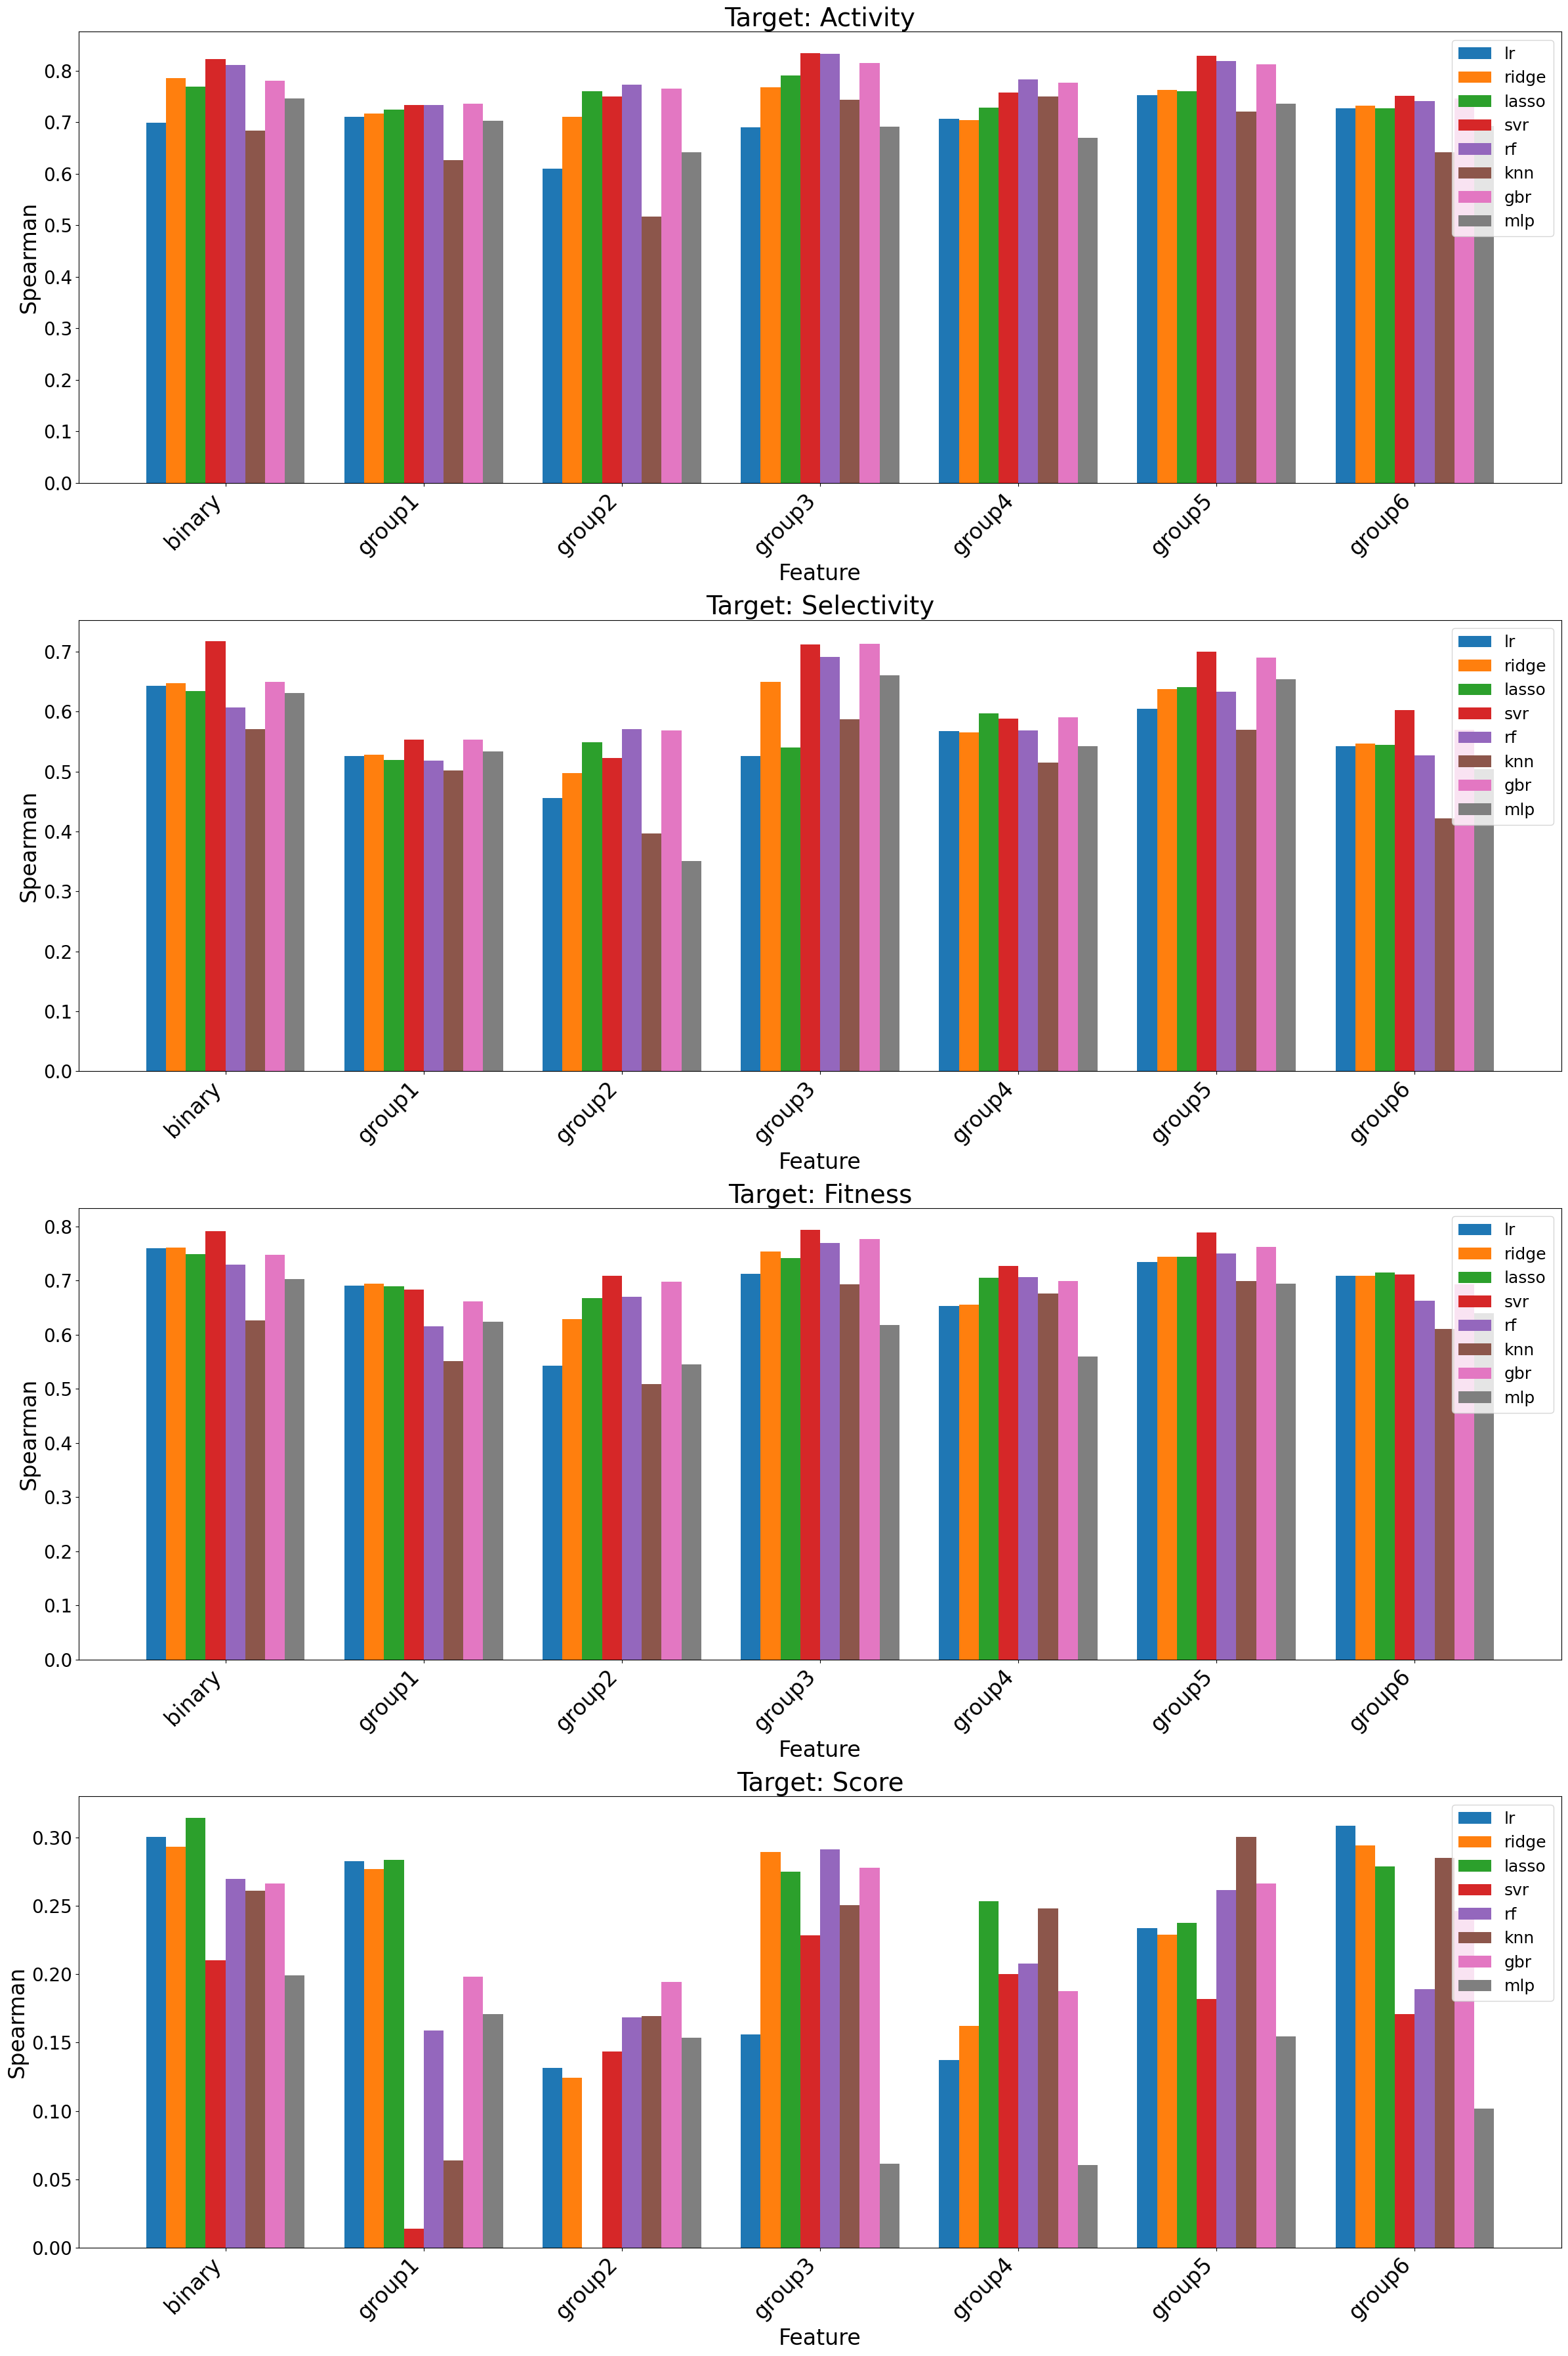

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# 假设您的数据存储在名为 pd_records 的DataFrame中
# 如果数据不在 pd_records 中，请替换为您的 DataFrame 名称

# 获取唯一的 'target' 值
unique_targets = pd_records['target'].unique()

# 创建一个图形，每个 'target' 对应一个子图
fig, axes = plt.subplots(len(unique_targets), figsize=(24, 36))

# 设置较小的柱状图宽度以减少重叠
bar_width = 0.1

# 迭代处理每个唯一的 'target'
for i, target in enumerate(unique_targets):
    # 筛选具有特定 'target' 值的行
    target_data = pd_records[pd_records['target'] == target]
    
    # 在当前子图中创建柱状图
    ax = axes[i]
    
    # 获取该 'target' 下的唯一 'regressor' 值
    unique_regressors = target_data['regressor'].unique()
    
    # 为每个唯一 'regressor' 创建柱状图
    for j, regressor in enumerate(unique_regressors):
        regressor_data = target_data[target_data['regressor'] == regressor]
        
        # 获取 'feature' 和 'spearman' 列的数据
        features = regressor_data['feature']
        spearmans = regressor_data['spearman']
        
        # 调整X轴位置以避免柱状图重叠
        x = np.arange(len(features)) + j * bar_width
        
        # 创建柱状图
        ax.bar(x, spearmans, bar_width, label=regressor)
    
    # 设置X轴标签和标题，并调整字号
    ax.set_xticks(np.arange(len(features)) + (len(unique_regressors) - 1) * bar_width / 2)
    ax.set_xticklabels(features, rotation=45, ha='right', fontsize=24)  # 设置X轴标签字号
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
    ax.set_xlabel('Feature', fontsize=24)  # 设置X轴标签字号
    ax.set_ylabel('Spearman', fontsize=24)  # 设置Y轴标签字号
    ax.set_title(f'Target: {target}', fontsize=28)  # 设置标题字号
    ax.legend(fontsize=18)  # 设置图例字号

# 调整子图之间的间距
plt.tight_layout()
plt.show()


#### best model

In [22]:
# 创建一个空的DataFrame来存储排名前k的行
top5_rows = pd.DataFrame(columns=pd_records.columns)
k = 10
# 迭代处理每个唯一的 'target'
for target in unique_targets:
    # 筛选具有特定 'target' 值的行
    target_data = pd_records[pd_records['target'] == target]
    
    # 根据 'spearman' 列对数据进行降序排序
    sorted_data = target_data.sort_values(by='spearman', ascending=False)
    
    # 获取排名前k的行
    top5 = sorted_data.head(k)
    
    # 将这些行添加到 top5_rows 中
    top5_rows = pd.concat([top5_rows, top5])

# 打印排名前k的行
top5_rows

,feature,time(s),regressor,target,rmse,mae,spearman
108,group3,17.619363,svr,Activity,2.782245e-01,1.918740e-01,0.833982
112,group3,378.544734,rf,Activity,2.948837e-01,1.929709e-01,0.833123
172,group5,1.100376,svr,Activity,2.894271e-01,1.969657e-01,0.828402
12,binary,1.072362,svr,Activity,2.840313e-01,2.008634e-01,0.822119
176,group5,11.696620,rf,Activity,3.111183e-01,2.026677e-01,0.818361
120,group3,337.069127,gbr,Activity,2.921410e-01,1.942371e-01,0.814923
184,group5,9.136544,gbr,Activity,2.897441e-01,1.946531e-01,0.812253
16,binary,4.582706,rf,Activity,3.008752e-01,1.975877e-01,0.810530
104,group3,6.952281,lasso,Activity,3.041339e-01,2.183959e-01,0.790520
4,binary,0.152660,ridge,Activity,3.087686e-01,2.268326e-01,0.785466


In [21]:
top5_rows.to_csv('top5_rows.tsv', sep='\t')

In [29]:
# 创建一个空的DataFrame来存储在不同 'target' 中出现的相同 'feature' 和 'regressor' 组合
common_combinations = pd.DataFrame(columns=['feature', 'regressor'])

# 获取唯一的 'feature' 和 'regressor' 组合
unique_combinations = top5_rows[['feature', 'regressor']].drop_duplicates()

# 迭代处理每个唯一的组合
for idx, row in unique_combinations.iterrows():
    feature = row['feature']
    regressor = row['regressor']
    
    # 检查是否每个 'target' 都包含该组合
    if (top5_rows[(top5_rows['feature'] == feature) & (top5_rows['regressor'] == regressor)]['target'].nunique() == len(unique_targets)):
        common_combinations = common_combinations.append({'feature': feature, 'regressor': regressor}, ignore_index=True)

# 打印在不同 'target' 中都出现的相同 'feature' 和 'regressor' 组合
common_combinations


C:\Users\66410\AppData\Local\Temp\ipykernel_42472\2177433912.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  common_combinations = common_combinations.append({'feature': feature, 'regressor': regressor}, ignore_index=True)


,feature,regressor
0,group3,rf


#### feature

In [36]:
import pandas as pd

# 假设您的数据存储在名为 pd_records 的DataFrame中
# 如果数据不在 pd_records 中，请替换为您的 DataFrame 名称

# 获取唯一的 'target' 值
unique_targets = pd_records['target'].unique()

# 创建一个空的DataFrame来存储排序后的结果
sorted_dataframes = []

# 迭代处理每个唯一的 'target'
for target in unique_targets:
    # 筛选具有特定 'target' 值的行
    target_data = pd_records[pd_records['target'] == target]
    
    # 为每个 'feature' 计算其最高的三个 'spearman' 均值和标准差
    top_3_features = target_data.groupby('feature')['spearman'].nlargest(3).reset_index(level=1, drop=True)
    top_3_features_mean = top_3_features.groupby('feature').mean()
    top_3_features_std = top_3_features.groupby('feature').std()
    
    # 创建一个DataFrame来存储排序后的结果
    sorted_dataframe = pd.DataFrame({
        'feature': top_3_features_mean.index,
        'mean_top_3': top_3_features_mean.values,
        'std_top_3': top_3_features_std.values
    })
    
    # 按 'mean_top_3' 从高到低排序
    sorted_dataframe = sorted_dataframe.sort_values(by='mean_top_3', ascending=False)
    
    # 添加到结果列表
    sorted_dataframes.append(sorted_dataframe)

# 创建每个 'target' 的 DataFrame
for i, target in enumerate(unique_targets):
    df_name = f"pd_feature_{target}"
    sorted_dataframes[i].to_csv(f"./results/{df_name}.tsv", sep='\t', index=False)
    print(f"DataFrame {df_name} saved as {df_name}.tsv")


DataFrame pd_feature_Activity saved as pd_feature_Activity.tsv
DataFrame pd_feature_Selectivity saved as pd_feature_Selectivity.tsv
DataFrame pd_feature_Fitness saved as pd_feature_Fitness.tsv
DataFrame pd_feature_Score saved as pd_feature_Score.tsv


,feature,mean_top_3,std_top_3
3,group3,0.827343,0.010764
5,group5,0.819672,0.008154
0,binary,0.806038,0.018734
4,group4,0.772288,0.013192
2,group2,0.766571,0.006529
6,group6,0.746400,0.005376
1,group1,0.734124,0.001449


C:\Users\66410\AppData\Local\Temp\ipykernel_42472\3369935786.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)


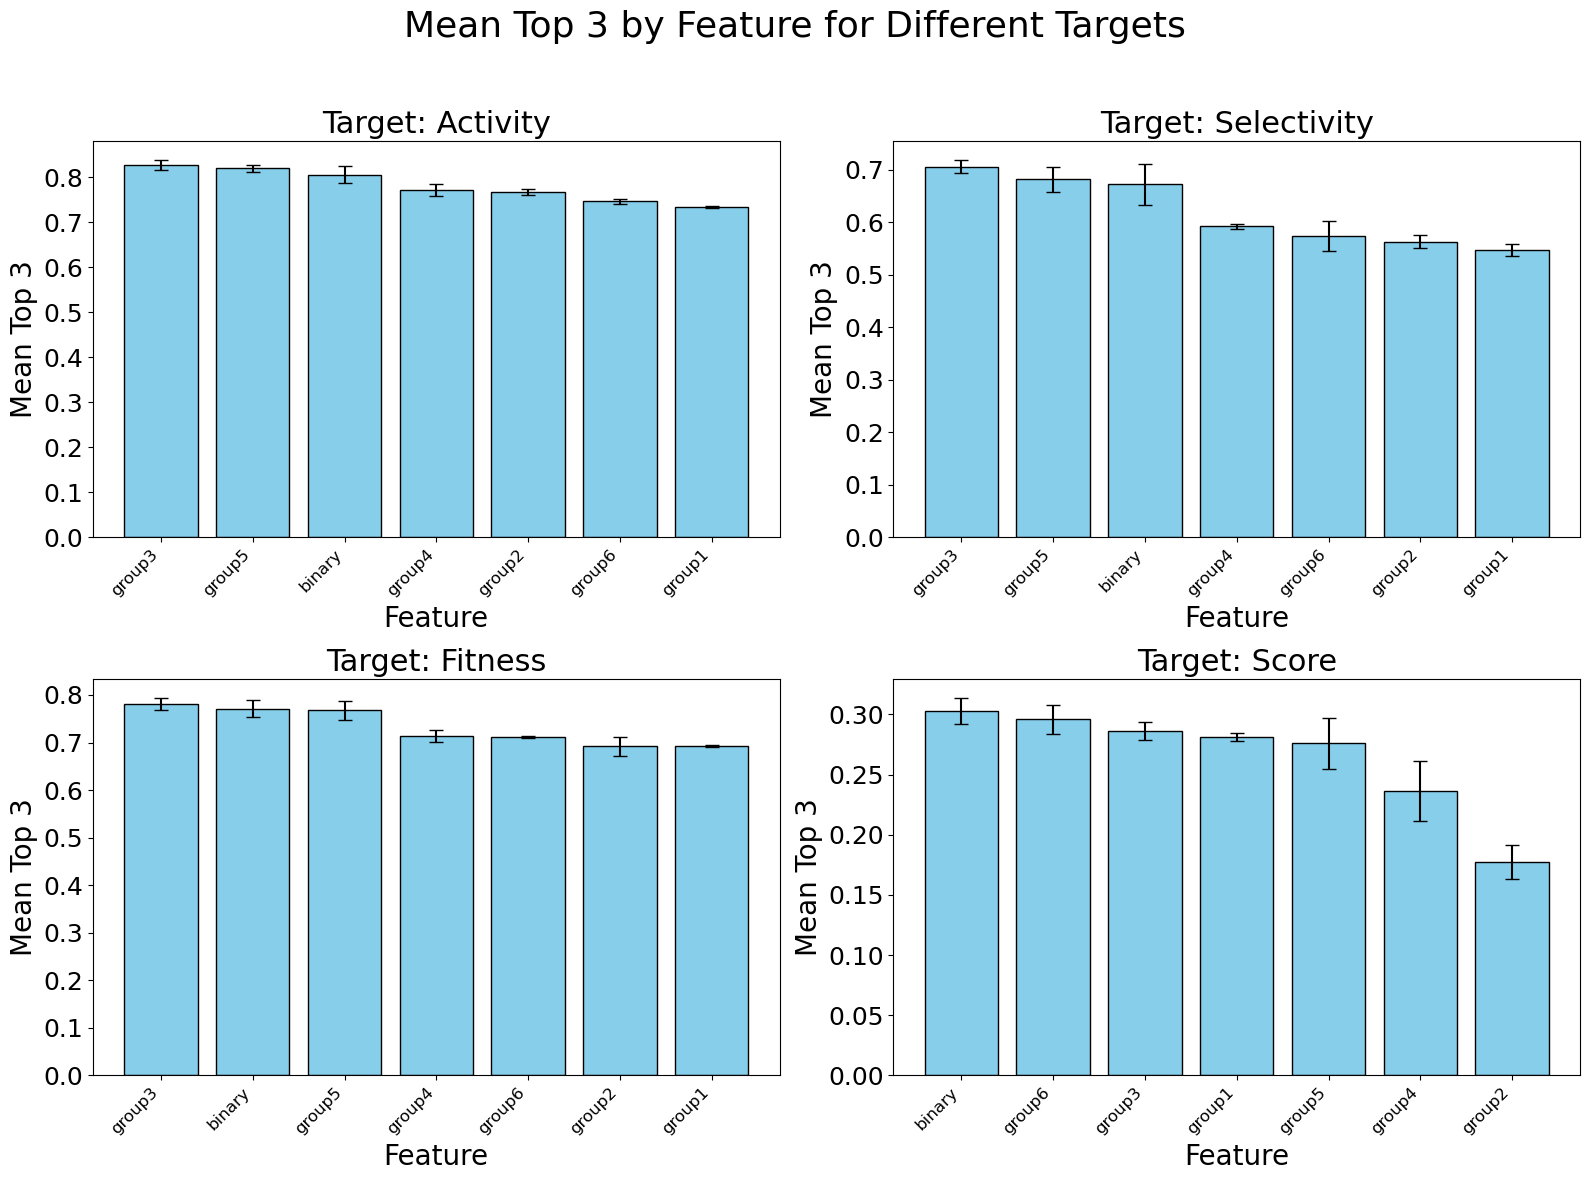

In [41]:
import matplotlib.pyplot as plt

# 假设您的 sorted_dataframes 存储了每个 'target' 的 DataFrame
# 如果数据不在 sorted_dataframes 中，请替换为您的 DataFrame 名称

# 创建一个图形，包含四个子图
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Mean Top 3 by Feature for Different Targets", fontsize=26)  # 设置总标题字体大小

# 用于追踪子图的索引
subplots = [(0, 0), (0, 1), (1, 0), (1, 1)]

for i, target in enumerate(unique_targets):
    # 获取目标 'target' 对应的 DataFrame
    df = sorted_dataframes[i]
    
    # 获取子图的索引
    row, col = subplots[i]
    
    # 在指定子图上创建柱状图
    ax = axes[row, col]
    
    # 获取 'feature'、'mean_top_3'、'std_top_3' 列的数据
    features = df['feature']
    mean_top_3 = df['mean_top_3']
    std_top_3 = df['std_top_3']
    
    # 调整X轴位置以避免柱状图重叠
    x = range(len(features))
    
    # 创建柱状图
    ax.bar(x, mean_top_3, yerr=std_top_3, capsize=5, color='skyblue', edgecolor='black')
    
    # 设置X轴标签和标题
    ax.set_xticks(x)
    ax.set_xticklabels(features, rotation=45, ha='right', fontsize=12)
    ax.set_xlabel('Feature', fontsize=20)  # 设置X轴标签字体大小
    ax.set_ylabel('Mean Top 3', fontsize=20)  # 设置Y轴标签字体大小
    ax.set_title(f"Target: {target}", fontsize=22)  # 设置标题字体大小

    # 调整Y轴刻度标签的字体大小
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)


# 调整子图之间的间距
plt.tight_layout(rect=[0, 0, 1, 0.95])

# 显示图形
plt.show()


In [ ]:
import pandas as pd

data = {
    "binary": ["BINARY"],  # binary
    "group1": ["AAC", "GAAC", "GDPC"],
    "group2": ["ZSCALE", "AAINDEX"],  # for equal length
    "group3": ["TA", "ASA", "DisorderB", "DisorderC"],  # for equal length
    "group4": ["CTDC", "CTDT", "CTDD"],
    "group5": ["BLOSUM62"],  # BLOSUM62
    "group6": ["EAAC", "EGAAC"],  # enhanced composition
}

# 创建一个空的 DataFrame
df = pd.DataFrame(columns=["feature_type", "feature_name"])

# 遍历字典并填充 DataFrame
for feature_type, feature_list in data.items():
    feature_names = ", ".join(feature_list)  # 将特征名称列表拼接成一个字符串
    df = df.append({"feature_type": feature_type, "feature_name": feature_names}, ignore_index=True)

# 打印 DataFrame
df

#### 模型

In [46]:
import pandas as pd

# 假设您的数据存储在名为 pd_records 的 DataFrame 中
# 如果数据不在 pd_records 中，请替换为您的 DataFrame 名称

# 获取唯一的 'target' 值
unique_targets = pd_records['target'].unique()

# 创建一个空的 DataFrame 来存储排序后的结果
sorted_dataframes = []

# 迭代处理每个唯一的 'target'
for target in unique_targets:
    # 筛选具有特定 'target' 值的行
    target_data = pd_records[pd_records['target'] == target]

    # 为每个 'regressor' 计算其最高的三个 'spearman' 均值和标准差
    top_3_regressors = target_data.groupby('regressor')['spearman'].nlargest(3).reset_index(level=1, drop=True)
    top_3_regressors_mean = top_3_regressors.groupby('regressor').mean()
    top_3_regressors_std = top_3_regressors.groupby('regressor').std()

    # 创建一个 DataFrame 来存储排序后的结果
    sorted_dataframe = pd.DataFrame({
        'regressor': top_3_regressors_mean.index,
        'mean_top_3': top_3_regressors_mean.values,
        'std_top_3': top_3_regressors_std.values
    })

    # 按 'mean_top_3' 从高到低排序
    sorted_dataframe = sorted_dataframe.sort_values(by='mean_top_3', ascending=False)

    # 添加到结果列表
    sorted_dataframes.append(sorted_dataframe)

# 创建每个 'target' 的 DataFrame
for i, target in enumerate(unique_targets):
    df_name = f"pd_regressor_{target}"
    sorted_dataframes[i].to_csv(f"./results/{df_name}.tsv", sep='\t', index=False)
    print(f"DataFrame {df_name} saved as {df_name}.tsv")


DataFrame pd_regressor_Activity saved as pd_regressor_Activity.tsv
DataFrame pd_regressor_Selectivity saved as pd_regressor_Selectivity.tsv
DataFrame pd_regressor_Fitness saved as pd_regressor_Fitness.tsv
DataFrame pd_regressor_Score saved as pd_regressor_Score.tsv


C:\Users\66410\AppData\Local\Temp\ipykernel_42472\2493698859.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)


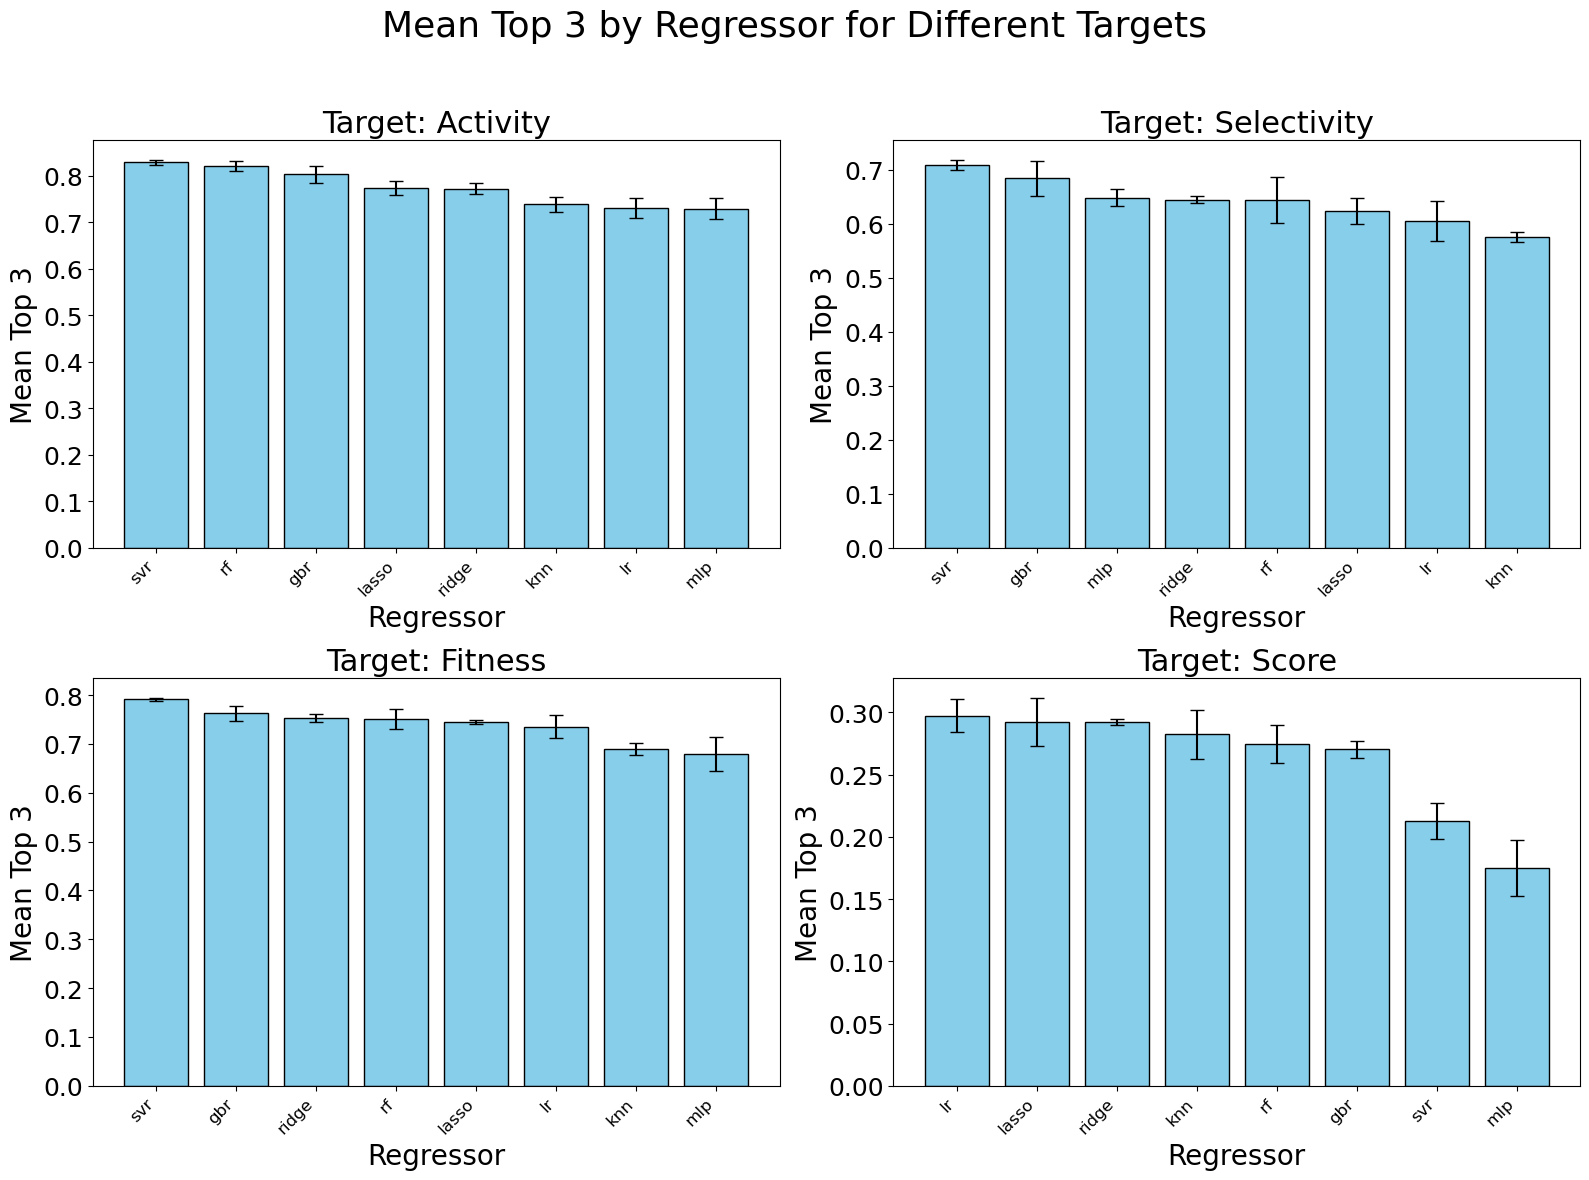

In [47]:
import matplotlib.pyplot as plt

# 假设您的 sorted_dataframes 存储了每个 'target' 的 DataFrame
# 如果数据不在 sorted_dataframes 中，请替换为您的 DataFrame 名称

# 创建一个图形，包含四个子图
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Mean Top 3 by Regressor for Different Targets", fontsize=26)  # 设置总标题字体大小

# 用于追踪子图的索引
subplots = [(0, 0), (0, 1), (1, 0), (1, 1)]

for i, target in enumerate(unique_targets):
    # 获取目标 'target' 对应的 DataFrame
    df = sorted_dataframes[i]
    
    # 获取子图的索引
    row, col = subplots[i]
    
    # 在指定子图上创建柱状图
    ax = axes[row, col]
    
    # 获取 'regressor'、'mean_top_3'、'std_top_3' 列的数据
    regressors = df['regressor']
    mean_top_3 = df['mean_top_3']
    std_top_3 = df['std_top_3']
    
    # 调整X轴位置以避免柱状图重叠
    x = range(len(regressors))
    
    # 创建柱状图
    ax.bar(x, mean_top_3, yerr=std_top_3, capsize=5, color='skyblue', edgecolor='black')
    
    # 设置X轴标签和标题
    ax.set_xticks(x)
    ax.set_xticklabels(regressors, rotation=45, ha='right', fontsize=12)
    ax.set_xlabel('Regressor', fontsize=20)  # 设置X轴标签字体大小
    ax.set_ylabel('Mean Top 3', fontsize=20)  # 设置Y轴标签字体大小
    ax.set_title(f"Target: {target}", fontsize=22)  # 设置标题字体大小

    # 调整Y轴刻度标签的字体大小
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)

# 调整子图之间的间距
plt.tight_layout(rect=[0, 0, 1, 0.95])

# 显示图形
plt.show()


### 训练时间

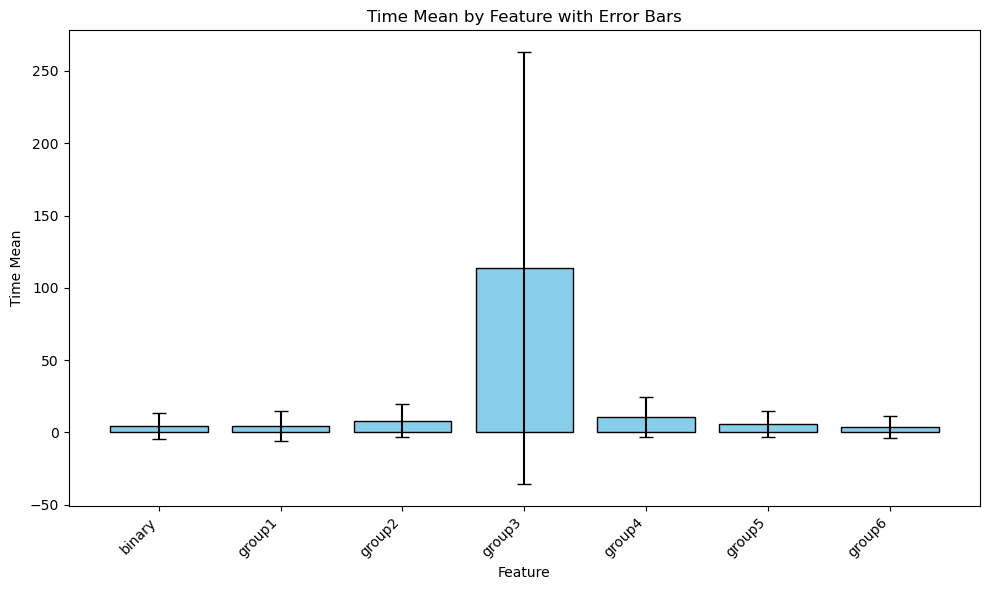

In [11]:
pd_time = pd_records.groupby('feature')['time(s)'].agg(['mean', 'std']).reset_index()

# 重命名列名
pd_time.columns = ['feature', 'time_mean', 'time_std']


# 提取 'feature'、'time_mean' 和 'time_std' 列的数据
features = pd_time['feature']
time_mean = pd_time['time_mean']
time_std = pd_time['time_std']

# 创建柱状图
plt.figure(figsize=(10, 6))
plt.bar(features, time_mean, yerr=time_std, capsize=5, color='skyblue', edgecolor='black')
plt.xlabel('Feature')
plt.ylabel('Time Mean')
plt.title('Time Mean by Feature with Error Bars')
plt.xticks(rotation=45, ha='right')  # 旋转X轴标签以避免重叠

# 显示误差线
# plt.errorbar(features, time_mean, yerr=time_std, fmt='none', ecolor='red', elinewidth=1, capsize=5)

# 显示柱状图
plt.tight_layout()
plt.show()


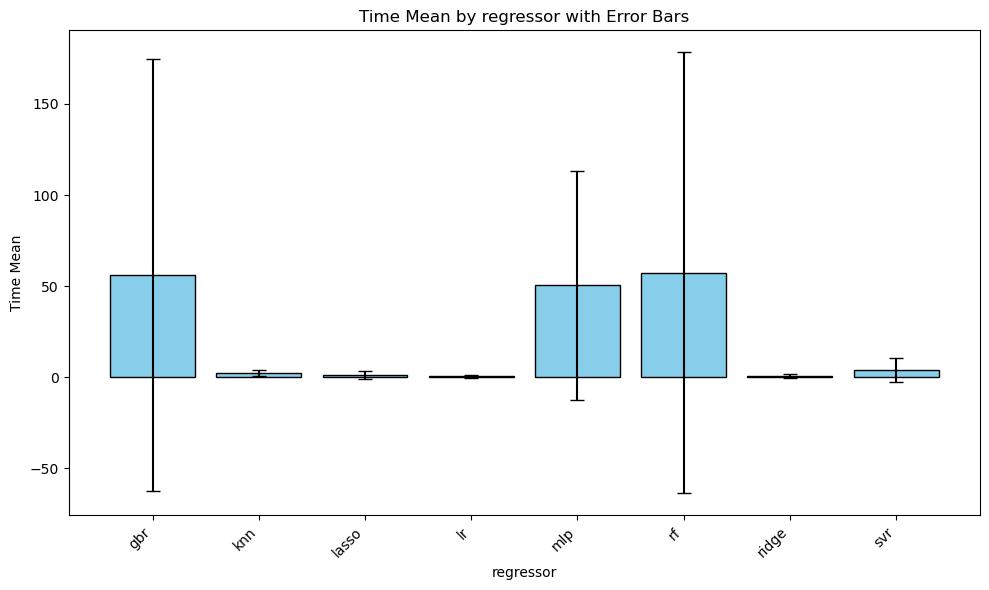

In [12]:
pd_time = pd_records.groupby('regressor')['time(s)'].agg(['mean', 'std']).reset_index()

# 重命名列名
pd_time.columns = ['regressor', 'time_mean', 'time_std']


# 提取 'regressor'、'time_mean' 和 'time_std' 列的数据
regressors = pd_time['regressor']
time_mean = pd_time['time_mean']
time_std = pd_time['time_std']

# 创建柱状图
plt.figure(figsize=(10, 6))
plt.bar(regressors, time_mean, yerr=time_std, capsize=5, color='skyblue', edgecolor='black')
plt.xlabel('regressor')
plt.ylabel('Time Mean')
plt.title('Time Mean by regressor with Error Bars')
plt.xticks(rotation=45, ha='right')  # 旋转X轴标签以避免重叠

# 显示误差线
# plt.errorbar(regressors, time_mean, yerr=time_std, fmt='none', ecolor='red', elinewidth=1, capsize=5)

# 显示柱状图
plt.tight_layout()
plt.show()
